In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio 
import os

In [31]:
hours_per_project = pd.read_csv('hours_per_project.csv')

In [32]:
hours_per_project

,Project ID,Country/region,Project group,Customer account,Project date,Category,Worker,Hours,Cost price,Sales currency,Sales price
0,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-TRAVELHRS,technician 1,13.5,65.0,EUR,95.0
1,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-NOR-HRS,technician 1,17.5,65.0,EUR,115.0
2,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-LABOUR-OVERTIME,technician 1,4.0,65.0,EUR,170.0
3,PR190001,FRA,SERVICE,1748,2018-10-12,PAID-TRAVELHRS,technician 1,13.5,65.0,EUR,95.0
4,PR190001,FRA,SERVICE,1748,2018-10-12,PAID-NOR-HRS,technician 1,17.5,65.0,EUR,115.0
...,...,...,...,...,...,...,...,...,...,...,...
5020,QTE-000192,DEU,SERVICE,10283,2021-04-22,PAID-NOR-HRS,technician 1,18.0,65.0,EUR,0.0
5021,QTE-000192,DEU,SERVICE,10283,2021-04-22,PAID-TRAVELHRSOVER,technician 1,8.5,65.0,EUR,0.0
5022,QTE-000194,POL,SERVICE,12430,2018-09-28,PAID-TRAVELHRS,technician 3,13.0,65.0,EUR,90.0
5023,QTE-000194,POL,SERVICE,12430,2018-09-28,PAID-NOR-HRS,technician 3,12.5,65.0,EUR,110.0


In [33]:
hours_per_years = {}
for year in range(2018, 2024):
    hours_per_year = hours_per_project[(hours_per_project['Project date'] > f'{year}-01-01') & (hours_per_project['Project date'] < f'{year}-12-31')]
    hours_per_years[f'hours_{year}'] = hours_per_year
    

In [34]:
hours_2018 = hours_per_years['hours_2018']
hours_2019 = hours_per_years['hours_2019']
hours_2020 = hours_per_years['hours_2020']
hours_2021 = hours_per_years['hours_2021']
hours_2022 = hours_per_years['hours_2022']
hours_2023 = hours_per_years['hours_2023']

In [35]:
hours_2018

,Project ID,Country/region,Project group,Customer account,Project date,Category,Worker,Hours,Cost price,Sales currency,Sales price
0,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-TRAVELHRS,technician 1,13.5,65.0,EUR,95.0
1,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-NOR-HRS,technician 1,17.5,65.0,EUR,115.0
2,PR190001,FRA,SERVICE,1748,2018-10-09,PAID-LABOUR-OVERTIME,technician 1,4.0,65.0,EUR,170.0
3,PR190001,FRA,SERVICE,1748,2018-10-12,PAID-TRAVELHRS,technician 1,13.5,65.0,EUR,95.0
4,PR190001,FRA,SERVICE,1748,2018-10-12,PAID-NOR-HRS,technician 1,17.5,65.0,EUR,115.0
...,...,...,...,...,...,...,...,...,...,...,...
5008,QTE-000192,DEU,SERVICE,10283,2018-10-23,PAID-NOR-HRS,technician 1,33.0,65.0,EUR,115.0
5009,QTE-000192,DEU,SERVICE,10283,2018-10-23,PAID-LABOUR-OVERTIME,technician 1,6.0,65.0,EUR,170.0
5022,QTE-000194,POL,SERVICE,12430,2018-09-28,PAID-TRAVELHRS,technician 3,13.0,65.0,EUR,90.0
5023,QTE-000194,POL,SERVICE,12430,2018-09-28,PAID-NOR-HRS,technician 3,12.5,65.0,EUR,110.0


In [36]:
total_hours = []
for df in hours_per_years.values():
    total_hours_year = pd.DataFrame(df.groupby('Country/region')['Hours'].agg(sum))
    total_hours.append(total_hours_year)

total_hours_per_country = pd.concat(total_hours, axis=1)

In [37]:
total_hours_per_country.columns = ['2018', '2019', '2020', '2021', '2022', '2023']

In [38]:
total_hours_per_country

,2018,2019,2020,2021,2022,2023
Country/region,,,,,,
AUT,86.0,215.50,86.0,NaN,93.5,13.0
BEL,624.5,986.50,486.0,417.0,331.5,465.0
CHE,81.5,139.00,51.5,66.0,76.0,64.0
DEU,1295.8,2230.25,799.0,951.0,1587.0,2052.0
DNK,67.0,53.00,38.0,20.0,93.0,72.0
ESP,257.0,327.50,634.5,129.5,160.0,316.5
FRA,1103.5,990.80,602.5,1172.0,799.0,972.5
GBR,1096.0,786.50,684.0,2418.5,1087.0,684.2
HRV,424.0,1076.50,304.5,NaN,139.5,107.0


In [39]:
total_hours_per_country['2018']

Country/region
AUT      86.0
BEL     624.5
CHE      81.5
DEU    1295.8
DNK      67.0
ESP     257.0
FRA    1103.5
GBR    1096.0
HRV     424.0
IDN     223.5
IND      50.0
IRL      16.0
ISR      38.5
ITA      43.5
NLD     622.0
POL      26.0
ROU      53.0
RUS     313.0
TUR     209.5
UKR     104.0
USA     303.5
ZAF     648.0
HUN       NaN
JOR       NaN
JPN       NaN
LVA       NaN
MTQ       NaN
NOR       NaN
PRT       NaN
SRB       NaN
SWE       NaN
CZE       NaN
DZA       NaN
COL       NaN
GRC       NaN
ALB       NaN
FIN       NaN
MAR       NaN
PAK       NaN
Name: 2018, dtype: float64

In [40]:
total_hours_per_country.fillna(0, inplace=True)
total_hours_per_country.reset_index(inplace=True)

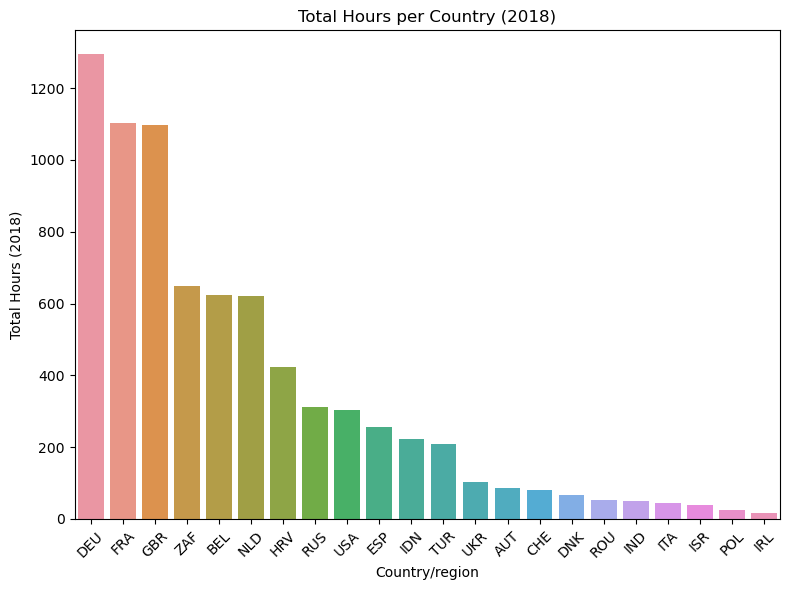

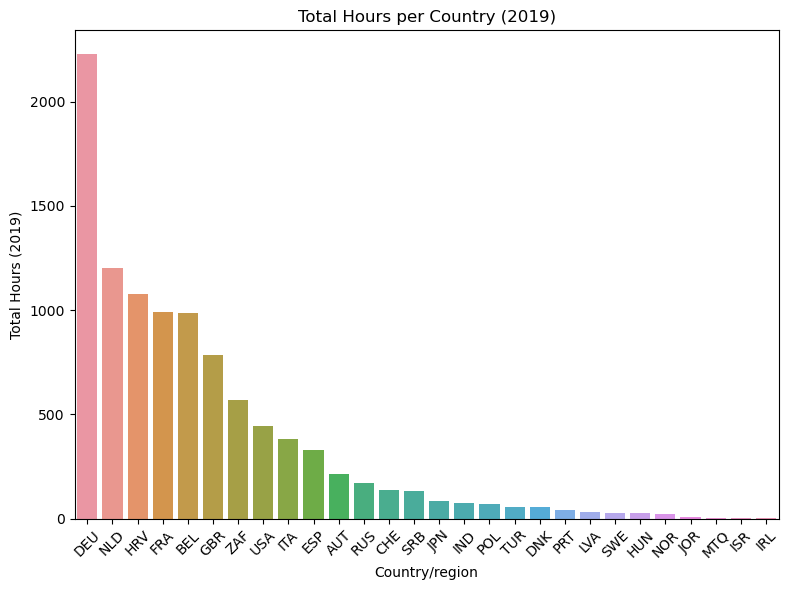

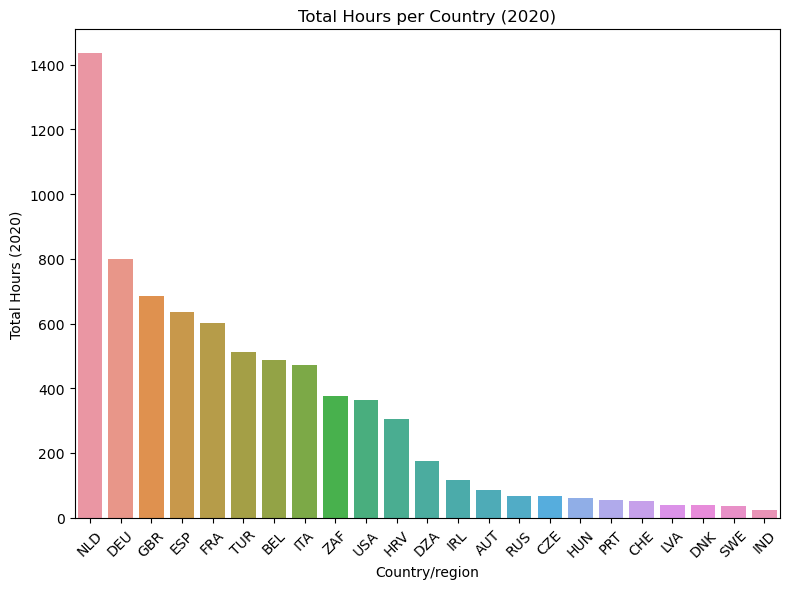

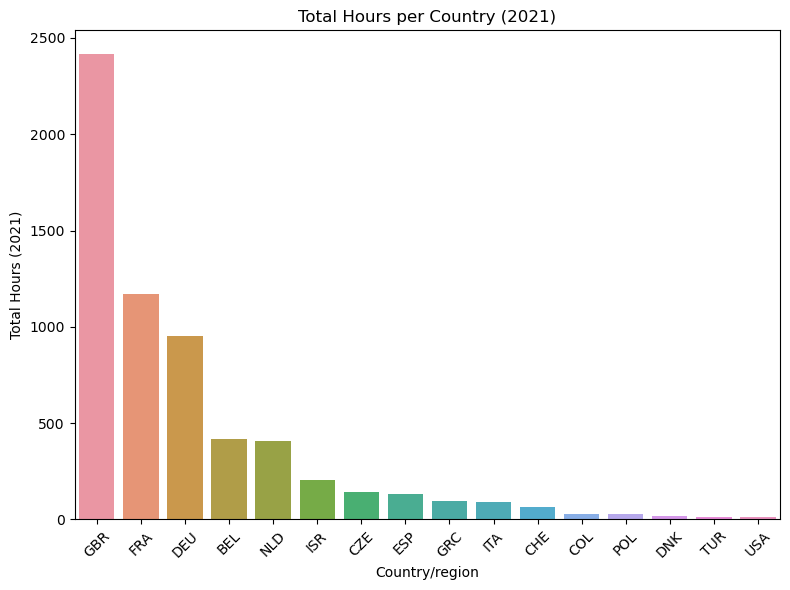

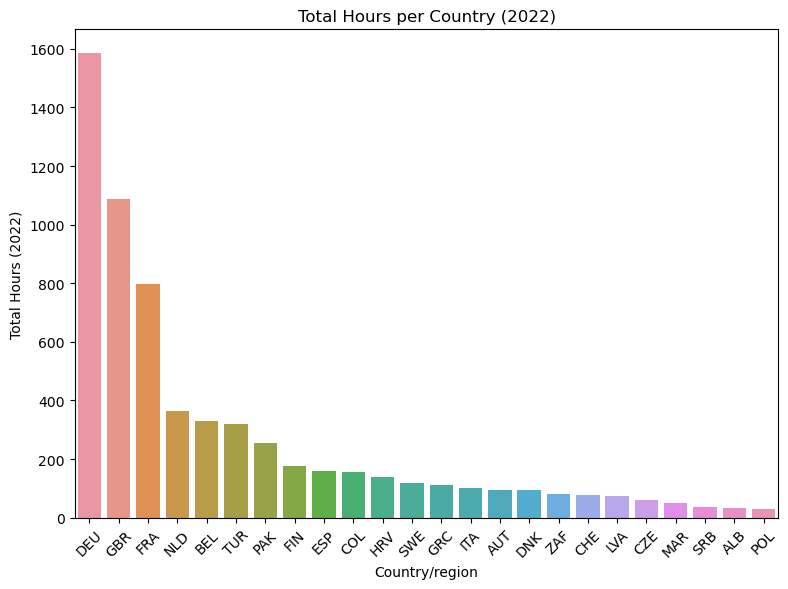

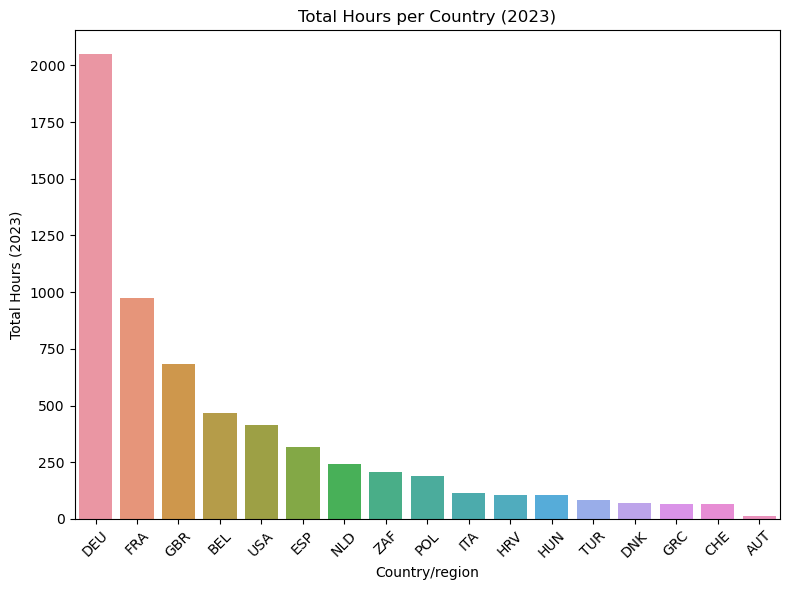

Plots saved successfully.


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

save_directory = 'plots/'
os.makedirs(save_directory, exist_ok=True)

# List of years to loop through
years = ['2018', '2019', '2020', '2021', '2022', '2023']

for year in years:
    # Create a new figure for each year
    plt.figure(figsize=(8, 6))
    
    # Create a bar plot for the current year
    filtered_hours = total_hours_per_country.loc[total_hours_per_country[year] != 0]
    sns.barplot(x='Country/region', y=year, data=filtered_hours.sort_values(by=year, ascending=False))
    plt.xlabel('Country/region')
    plt.ylabel('Total Hours ({})'.format(year))
    plt.title('Total Hours per Country ({})'.format(year))
    plt.xticks(rotation=45)
    
    # Save the plot as an image
    image_name = f'{year}_total_hours'
    image_path = os.path.join('plots', image_name)
    plt.savefig(image_path, bbox_inches='tight')
    
    # Show the plot (optional)
    plt.tight_layout()
    plt.show()

print("Plots saved successfully.")


In [42]:
hours_per_project.to_excel( "hours_per_project.xlsx", index=False)

In [43]:
map_hours = hours_per_project.groupby(["Country/region"]).agg({"Hours":"sum"}).reset_index()

data = dict(type = 'choropleth',
            locations = map_hours["Country/region"],
            z = map_hours["Hours"],
            text = map_hours["Country/region"],
            colorbar = {'title': 'Hours'})

# define layout
layout = dict(geo ={'showframe': False, 'projection': {'type': 'mercator'}})

# create map
fig5 = go.Figure(data = [data], layout = layout)
fig5.show()

In [44]:
map_hours = hours_per_project.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours['Country/region'],
    z=map_hours['Hours'],
    text=map_hours['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Hours by Country'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 700,
              width = 1000
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

In [45]:
map_hours_2018 = hours_2018.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours['Country/region'],
    z=map_hours['Hours'],
    text=map_hours['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Service Hours 2018'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 800,
              width = 1200
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'map_hours_2018.png')
pio.write_image(fig, file_path)

In [46]:
map_hours_2019 = hours_2019.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours['Country/region'],
    z=map_hours['Hours'],
    text=map_hours['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Service Hours 2019'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 800,
              width = 1200
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'map_hours_2019.png')
pio.write_image(fig, file_path)

In [47]:
map_hours_2020 = hours_2020.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours_2020['Country/region'],
    z=map_hours_2020['Hours'],
    text=map_hours_2020['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Service Hours 2020'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 800,
              width = 1200
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

import plotly.io as pio 
import os

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'map_hours_2020.png')
pio.write_image(fig, file_path)

In [48]:
map_hours_2021 = hours_2021.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours_2021['Country/region'],
    z=map_hours_2021['Hours'],
    text=map_hours_2021['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Service Hours 2021'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 800,
              width = 1200
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'map_hours_2021.png')
pio.write_image(fig, file_path)

In [49]:
map_hours_2022 = hours_2022.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours_2022['Country/region'],
    z=map_hours_2022['Hours'],
    text=map_hours_2022['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Service Hours 2022'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 800,
              width = 1200
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'map_hours_2022.png')
pio.write_image(fig, file_path)

In [50]:
map_hours_2023 = hours_2023.groupby('Country/region').agg({'Hours':'sum'}).reset_index()

custom_colorscale = 'YlGnBu'

# Create choropleth map trace
choropleth_map = go.Choropleth(
    locations=map_hours_2023['Country/region'],
    z=map_hours_2023['Hours'],
    text=map_hours_2023['Country/region'],
    colorscale=custom_colorscale,  # Set custom colorscale
    colorbar={'title': 'Total Service Hours 2023'}
)

layout = dict(geo={'showframe': False, 'projection': {'type':'mercator'}},
              height = 800,
              width = 1200
)

fig = go.Figure(data=[choropleth_map], layout=layout)
fig.show()

folder_path = r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\Mid-bootcamp project\plots'
file_path = os.path.join(folder_path, 'map_hours_2023.png')
pio.write_image(fig, file_path)